TOPIC MODELLING

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import re
df = pd.read_csv(r"C:\Users\HP\__new_processed_tweet_data.csv")

In [34]:
df

,created_at,clean_tweets,statuses_count,source,language,followers_count,friends_count,favourite_count,retweet_count,subjectivity,polarity
0,Sun Aug 07 22:31:20 +0000 2022,Extra random image (I): Lets focus in one very...,8097,"<a href=""http://twitter.com/download/android"" ...",en,20497,2621,15760,2,0.190625,-1.250000e-01
1,Sun Aug 07 22:31:16 +0000 2022,China's media explains the military reasons fo...,5831,"<a href=""http://twitter.com/download/android"" ...",en,65,272,6967,201,0.100000,-1.000000e-01
2,Sun Aug 07 22:31:07 +0000 2022,"China even cut off communication, they don't a...",1627,"<a href=""http://twitter.com/download/android"" ...",en,85,392,2166,0,0.000000,0.000000e+00
3,Sun Aug 07 22:31:06 +0000 2022,"Putin to XiJinping : I told you my friend, Tai...",1627,"<a href=""http://twitter.com/download/android"" ...",en,85,392,2166,0,0.350000,1.000000e-01
4,Sun Aug 07 22:31:04 +0000 2022,"I’m sorry, I thought Taiwan was an independent...",18958,"<a href=""http://twitter.com/download/iphone"" r...",en,910,2608,17247,381,0.556250,-6.938894e-18
...,...,...,...,...,...,...,...,...,...,...,...
21995,Sat Aug 06 18:03:29 +0000 2022,A good infographic of China's missile launches...,6600,"<a href=""http://twitter.com/download/android"" ...",en,62,471,9683,183,0.600000,7.000000e-01
21996,Sat Aug 06 18:03:27 +0000 2022,A good infographic of China's missile launches...,3739,"<a href=""http://twitter.com/download/android"" ...",en,94,1751,11538,183,0.600000,7.000000e-01
21997,Sat Aug 06 18:03:27 +0000 2022,Thanks Pelosi smart move.,3540,"<a href=""http://twitter.com/download/android"" ...",en,88,0,1940,0,0.421429,2.071429e-01
21998,Sat Aug 06 18:03:26 +0000 2022,Taiwan people's Desire for Unification With Ch...,21833,"<a href=""http://twitter.com/download/android"" ...",en,537,317,11849,67,0.350000,5.000000e-02


In [35]:
class PrepareData:
    def __init__(self,df):
        self.df=df
    
    def preprocess_data(self):
        df = self.df.loc[self.df['language'] =="en"]

    
        #text Preprocessing
        df['clean_tweets']=df['clean_tweets'].astype(str)
        df['clean_tweets'] = df['clean_tweets'].apply(lambda x: x.lower())
        df['clean_tweets']= df['clean_tweets'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

        #Converting tweets to list of words For feature engineering
        sentence_list = [tweet for tweet in df['clean_tweets']]
        word_list = [sent.split() for sent in sentence_list]
        # print(word_list)

        #Create dictionary which contains Id and word 
        word_to_id = corpora.Dictionary(word_list) #generate unique tokens
        #  we can see the word to unique integer mapping
        # print(word_to_id.token2id)
        # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
        corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
        # TFIDF

        return word_list, word_to_id, corpus_1
    
    
class getldatopicsandperplexity():
    def __init__(self,corpus,id2words):
        self.corpus= corpus
        self.id2words = id2words
    
    
    def ldamodell(self):
        lda_model = gensim.models.ldamodel.LdaModel(self.corpus,
                                           id2word=self.id2words,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        self.lda_model = lda_model
        return lda_model.print_topics(),lda_model.show_topics(formatted=False)
    
    
    def printcoherencescore(self):
        Perplexity = self.lda_model.log_perplexity(self.corpus)
        doc_lda = self.lda_model[self.corpus]
        coherence_model_lda = CoherenceModel(model=self.lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        return coherence_lda,Perplexity
        



    

In [36]:
PrepareData_obj=PrepareData(df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()
getldatopics = getldatopicsandperplexity(corpus,id2word)
ldatopics,formattedtopics = getldatopics.ldamodell()
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]
coherence_score , perplexity = getldatopics.printcoherencescore()

In [37]:
ldatopics

[(0,
  '0.021*"china" + 0.021*"in" + 0.017*"ukraine" + 0.016*"about" + 0.016*"video" + 0.014*"taiwan" + 0.012*"to" + 0.012*"not" + 0.012*"hotel" + 0.012*"russia"'),
 (1,
  '0.045*"the" + 0.044*"to" + 0.030*"in" + 0.029*"taiwan" + 0.021*"chinese" + 0.014*"on" + 0.014*"with" + 0.014*"island" + 0.013*"of" + 0.012*"have"'),
 (2,
  '0.067*"taiwan" + 0.058*"the" + 0.044*"of" + 0.032*"a" + 0.032*"is" + 0.030*"and" + 0.030*"on" + 0.029*"china" + 0.019*"for" + 0.018*"to"'),
 (3,
  '0.031*"the" + 0.031*"taiwan" + 0.025*"is" + 0.024*"china" + 0.022*"to" + 0.021*"it" + 0.020*"an" + 0.018*"i" + 0.015*"we" + 0.014*"how"'),
 (4,
  '0.068*"pelosi" + 0.027*"of" + 0.018*"to" + 0.018*"her" + 0.018*"speaker" + 0.017*"the" + 0.013*"did" + 0.013*"nancy" + 0.012*"house" + 0.012*"amp"')]

In [38]:
formattedtopics

[(0,
  [('china', 0.020712763),
   ('in', 0.020556532),
   ('ukraine', 0.017370496),
   ('about', 0.016042944),
   ('video', 0.015913207),
   ('taiwan', 0.013520407),
   ('to', 0.012285971),
   ('not', 0.012230107),
   ('hotel', 0.012018975),
   ('russia', 0.011646922)]),
 (1,
  [('the', 0.044513423),
   ('to', 0.044419795),
   ('in', 0.029513713),
   ('taiwan', 0.029173),
   ('chinese', 0.020700987),
   ('on', 0.014130396),
   ('with', 0.01408592),
   ('island', 0.013591897),
   ('of', 0.013160211),
   ('have', 0.012120359)]),
 (2,
  [('taiwan', 0.06670937),
   ('the', 0.058308717),
   ('of', 0.043799873),
   ('a', 0.03240542),
   ('is', 0.031535525),
   ('and', 0.03016586),
   ('on', 0.030131591),
   ('china', 0.028737303),
   ('for', 0.019138359),
   ('to', 0.018260883)]),
 (3,
  [('the', 0.031152043),
   ('taiwan', 0.030821126),
   ('is', 0.025333757),
   ('china', 0.023999913),
   ('to', 0.021915829),
   ('it', 0.020508649),
   ('an', 0.020043109),
   ('i', 0.01777766),
   ('we', 

In [39]:
perplexity

-7.451021742850383

In [40]:
coherence_score

0.2907961566013916

SENTIMENT ANALYSIS

In [250]:
class Clean_tweetss():
    def __init__(self,df):
        self.df = df
        
    def organise_data(self):
        Cleaned_tweets = pd.DataFrame()
        Cleaned_tweets['Clean_text'] = self.df['clean_tweets']
        Cleaned_tweets['Polarity'] = self.df['polarity']
        self.Cleaned_tweets = Cleaned_tweets
        return Cleaned_tweets
    
    def Text_Category(self,p):
        newp = []
        for i in p:
            if i > 0:
                newp.append('positive')
            elif i<0:
                newp.append('negative')
            else:
                newp.append('neutral')
        return newp
    def removeneutralandresetindex(self,data):
        indexx = []
        for i in range(len(data)):
            if data['Score'][i] == 'neutral':
                indexx.append(i)
        data = data.drop(indexx)      
        data= data.reset_index(drop=True)
        return data
    def newscore(self,data):
        newscore = []
        for i in data['Score']:
            if i == 'negative':
                newscore.append(0)
            else:
                newscore.append(1)

        data['Score'] = newscore
        return data
    def plotpiechart(self,data):
        data.groupby('Score')['Score'].count().plot.pie(autopct='%.2f',figsize=(5,5))
        
        
    def plotbarchart(self,data):
        data.groupby('Score')['Score'].count().plot.bar(figsize=(5,5))
        
    def vectorize_wordsandsplit(self,data):
        from sklearn.model_selection import train_test_split
        from sklearn.feature_extraction.text import CountVectorizer
        import numpy as np
        from sklearn.preprocessing import StandardScaler
        from sklearn.pipeline import make_pipeline
        cv = CountVectorizer()
        y = data['Score']
        X_traincv = cv.fit_transform(data['Clean_text'])
        nnnx = X_traincv.toarray()
        X_train, X_test, y_train, y_test = train_test_split(nnnx, y, test_size=0.33, random_state=42)
        
        return X_train, X_test, y_train, y_test
    
    def trainandsplit(self,x,y,xtest,ytest):
        from sklearn.linear_model import SGDClassifier
        clf = SGDClassifier(max_iter=1000, tol=1e-3)
        clf.fit(x,y)
        predicted_score = clf.predict(xtest)
        accuracy = f'{100*clf.score(X_test,y_test)}% Accuracy'
        return predicted_score,accuracy
        

        

In [259]:
Cleaned_tweets = Clean_tweetss(df)
newfreshdata =  Cleaned_tweets.organise_data()
polaritychange = Cleaned_tweets.Text_Category(newfreshdata['Polarity'])
newfreshdata['Score'] = polaritychange


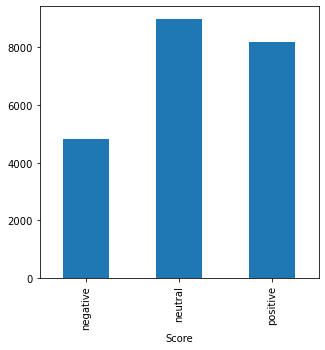

In [261]:
Cleaned_tweets.plotbarchart(newfreshdata)

In [251]:
Cleaned_tweets = Clean_tweetss(df)
newfreshdata =  Cleaned_tweets.organise_data()
polaritychange = Cleaned_tweets.Text_Category(newfreshdata['Polarity'])
newfreshdata['Score'] = polaritychange
removeneutralandreset =  Cleaned_tweets.removeneutralandresetindex(newfreshdata)
createnewcolmnscore = Cleaned_tweets.newscore(removeneutralandreset)
X_train, X_test, y_train, y_test =  Cleaned_tweets.vectorize_wordsandsplit(createnewcolmnscore)
predicted_score, accuracy= Cleaned_tweets.trainandsplit(X_train,y_train, X_test, y_test)

In [252]:
newfreshdata

,Clean_text,Polarity,Score
0,Extra random image (I): Lets focus in one very...,-1.250000e-01,negative
1,China's media explains the military reasons fo...,-1.000000e-01,negative
2,"China even cut off communication, they don't a...",0.000000e+00,neutral
3,"Putin to XiJinping : I told you my friend, Tai...",1.000000e-01,positive
4,"I’m sorry, I thought Taiwan was an independent...",-6.938894e-18,negative
...,...,...,...
21995,A good infographic of China's missile launches...,7.000000e-01,positive
21996,A good infographic of China's missile launches...,7.000000e-01,positive
21997,Thanks Pelosi smart move.,2.071429e-01,positive
21998,Taiwan people's Desire for Unification With Ch...,5.000000e-02,positive


In [253]:
polaritychange

['negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 '

In [254]:
newfreshdata['Score']

0        negative
1        negative
2         neutral
3        positive
4        negative
           ...   
21995    positive
21996    positive
21997    positive
21998    positive
21999    positive
Name: Score, Length: 22000, dtype: object

In [255]:
removeneutralandreset

,Clean_text,Polarity,Score
0,Extra random image (I): Lets focus in one very...,-1.250000e-01,0
1,China's media explains the military reasons fo...,-1.000000e-01,0
2,"Putin to XiJinping : I told you my friend, Tai...",1.000000e-01,1
3,"I’m sorry, I thought Taiwan was an independent...",-6.938894e-18,0
4,We must not let this happen. We must be ready....,2.000000e-01,1
...,...,...,...
13013,A good infographic of China's missile launches...,7.000000e-01,1
13014,A good infographic of China's missile launches...,7.000000e-01,1
13015,Thanks Pelosi smart move.,2.071429e-01,1
13016,Taiwan people's Desire for Unification With Ch...,5.000000e-02,1


In [256]:
createnewcolmnscore

,Clean_text,Polarity,Score
0,Extra random image (I): Lets focus in one very...,-1.250000e-01,0
1,China's media explains the military reasons fo...,-1.000000e-01,0
2,"Putin to XiJinping : I told you my friend, Tai...",1.000000e-01,1
3,"I’m sorry, I thought Taiwan was an independent...",-6.938894e-18,0
4,We must not let this happen. We must be ready....,2.000000e-01,1
...,...,...,...
13013,A good infographic of China's missile launches...,7.000000e-01,1
13014,A good infographic of China's missile launches...,7.000000e-01,1
13015,Thanks Pelosi smart move.,2.071429e-01,1
13016,Taiwan people's Desire for Unification With Ch...,5.000000e-02,1


In [257]:
X_train, X_test, y_train, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 6110     1
 9923     1
 4411     1
 12646    0
 5653     1
         ..
 11964    1
 5191     0
 5390     1
 860      0
 7270     0
 Name: Score, Length: 8722, dtype: int64,
 811     0
 5945    1
 353     1
 3409    1
 4900    1
        ..
 2423    1
 7074    0
 5277    1
 7242    0
 5893    1
 Name: Score, Length: 4296, dtype: int64)

In [258]:
predicted_score, accuracy

(array([1, 1, 1, ..., 1, 0, 1], dtype=int64), '94.80912476722533% Accuracy')